<h2>News Category Classification Model  <a href='https://www.kaggle.com/datasets/rmisra/news-category-dataset' target='_blank'>News Dataset Link (Kaggle)</a></h2>

In [59]:
import pandas as pd

In [60]:
df = pd.read_json("Datasets/News_category_dataset_v3.json",lines=True)

In [61]:
df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [62]:
min_samples = 1000
df_business = df[ df["category"] == 'BUSINESS'].sample(min_samples,random_state=2022)
df_sport = df[ df["category"] == 'SPORTS'].sample(min_samples,random_state=2022)
df_crime = df[ df["category"] == 'CRIME'].sample(min_samples,random_state=2022)
df_science = df[ df["category"] == 'SCIENCE'].sample(min_samples,random_state=2022)

In [63]:
df = pd.concat([df_business,df_sport,df_crime,df_science],axis=0)

In [64]:
df

,link,headline,category,short_description,authors,date
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17
...,...,...,...,...,...,...
135430,https://www.huffingtonpost.com/entry/violent-v...,Violent Video Games Don't Exist,SCIENCE,"Violent video games don't exist -- in fact, no...","Christopher J. Ferguson, Contributor\nProfesso...",2014-03-29
100742,https://www.huffingtonpost.com/entry/wearing-a...,How The Clothing You Wear Affects The Way You ...,SCIENCE,,Carolyn Gregoire,2015-05-02
19938,https://www.huffingtonpost.com/entry/slow-eart...,"As World Turns More Slowly, We Face Earthquake...",SCIENCE,The number of severe quakes could triple next ...,Mary Papenfuss,2017-11-21
193814,https://www.huffingtonpost.com/entry/saturns-r...,"Saturn's Rings: Cassini Probe Orbits Planet, O...",SCIENCE,By: Tariq Malik Published: 07/13/2012 04:24 PM...,,2012-07-15


In [65]:
df["category_num"] = df.category.map({
    "BUSINESS":0,
    "SPORTS":1,
    "CRIME":2,
    "SCIENCE":3
})

In [66]:
df = pd.DataFrame({
    "text": df["short_description"],
    "category":df["category"],
    "category_num":df["category_num"]
})

In [67]:
df

,text,category,category_num
181516,"I loved my years in corporate America, which I...",BUSINESS,0
58552,A new battery upgrade extends the range of the...,BUSINESS,0
155102,Caterpillar will not break any profit records ...,BUSINESS,0
71725,The U.S. is the world's hottest new tax haven.,BUSINESS,0
80455,"A boyish drug company entrepreneur, who rocket...",BUSINESS,0
...,...,...,...
135430,"Violent video games don't exist -- in fact, no...",SCIENCE,3
100742,,SCIENCE,3
19938,The number of severe quakes could triple next ...,SCIENCE,3
193814,By: Tariq Malik Published: 07/13/2012 04:24 PM...,SCIENCE,3


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(
    df.text,
    df.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.category_num
)

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
clf = Pipeline([
    ('vectorizer_bow',CountVectorizer(ngram_range=(1,4))),
    ('Multinomial NB',MultinomialNB()),
])

In [72]:
clf.fit(x_train,y_train)

,steps,"[('vectorizer_bow', ...), ('Multinomial NB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [73]:
y_pred = clf.predict(x_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.93      0.60       200
           1       0.84      0.43      0.57       200
           2       0.75      0.54      0.63       200
           3       0.74      0.50      0.60       200

    accuracy                           0.60       800
   macro avg       0.69      0.60      0.60       800
weighted avg       0.69      0.60      0.60       800



In [75]:
x_test[:5]

9954      The Super Bowl MVP chats with a childhood frie...
59647     The girl is estimated to be about 2 and is not...
44155     The uprising began midday on Wednesday and las...
89420                             "The oath is colorblind."
186786    But lockouts are hardly just the domain of pro...
Name: text, dtype: object

In [76]:
y_test[:5]

9954      1
59647     2
44155     2
89420     2
186786    0
Name: category_num, dtype: int64

<ul>
    <li>Business => 0</li>
    <li>Sports => 1</li>
    <li>Crime => 2</li>
    <li>Science => 3</li>
</ul>

In [77]:
y_pred[:5]

array([1, 0, 3, 0, 0])

In [78]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

Text(95.72222222222221, 0.5, 'Truth')

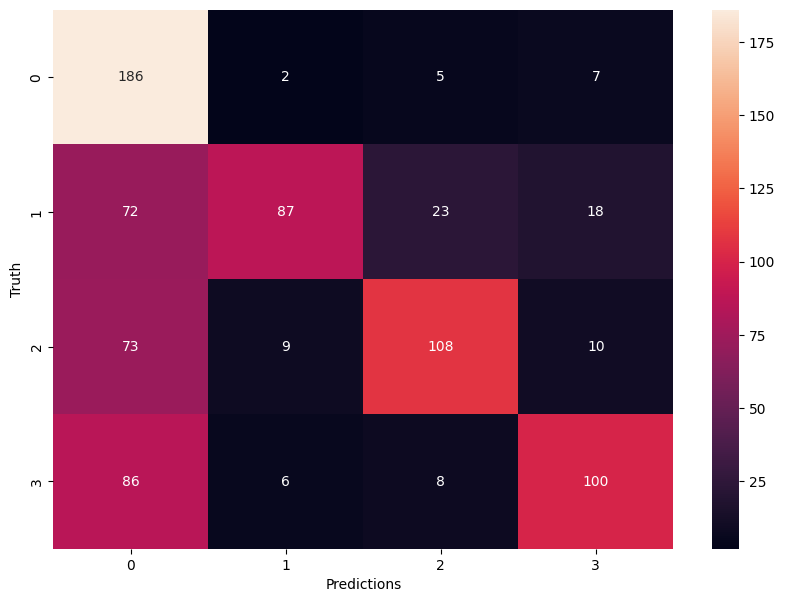

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")